In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import pickle
import os

In [2]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\Car Dekho Selling Price Prediction")
df = pd.read_csv("CDSPP_FS.csv")
df

,name,year,selling_price,fuel,seller_type,transmission
0,Maruti 800 AC,2007.0,60000.0,Petrol,Individual,Manual
1,Maruti Wagon R LXI Minor,2007.0,135000.0,Petrol,Individual,Manual
2,Hyundai Verna 1.6 SX,2012.0,600000.0,Diesel,Individual,Manual
3,Datsun RediGO T Option,2017.0,250000.0,Petrol,Individual,Manual
4,Honda Amaze VX i-DTEC,2014.0,450000.0,Diesel,Individual,Manual
...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014.0,409999.0,Diesel,Individual,Manual
4336,Hyundai i20 Magna 1.4 CRDi,2014.0,409999.0,Diesel,Individual,Manual
4337,Maruti 800 AC BSIII,2009.0,110000.0,Petrol,Individual,Manual
4338,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000.0,Diesel,Individual,Manual


## Checking datatypes

In [3]:
df.dtypes

name              object
year             float64
selling_price    float64
fuel              object
seller_type       object
transmission      object
dtype: object

In [4]:
categorical = []
continuous = []
for column in df.columns:
    if df[column].dtypes == "int64" or df[column].dtypes == "float64":
        continuous.append(column)
    if df[column].dtypes == "object":
        categorical.append(column)

In [5]:
categorical,continuous

(['name', 'fuel', 'seller_type', 'transmission'], ['year', 'selling_price'])

## Checking Categorical Variables

In [6]:
df.shape

(4340, 6)

In [7]:
len(df['name'].unique())

1491

In [8]:
len(df['fuel'].unique())

5

In [9]:
len(df['seller_type'].unique())

3

In [10]:
len(df['transmission'].unique())

2

## Encoding Categorical Variables

### Transmission Variable

In [11]:
le = LabelEncoder()
df['transmission_le'] = le.fit_transform(df['transmission'])

In [12]:
pickle.dump(le, open('transmission_le.pkl','wb'))

In [13]:
df.drop(['transmission'], axis=1, inplace=True)

In [14]:
df

,name,year,selling_price,fuel,seller_type,transmission_le
0,Maruti 800 AC,2007.0,60000.0,Petrol,Individual,1
1,Maruti Wagon R LXI Minor,2007.0,135000.0,Petrol,Individual,1
2,Hyundai Verna 1.6 SX,2012.0,600000.0,Diesel,Individual,1
3,Datsun RediGO T Option,2017.0,250000.0,Petrol,Individual,1
4,Honda Amaze VX i-DTEC,2014.0,450000.0,Diesel,Individual,1
...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014.0,409999.0,Diesel,Individual,1
4336,Hyundai i20 Magna 1.4 CRDi,2014.0,409999.0,Diesel,Individual,1
4337,Maruti 800 AC BSIII,2009.0,110000.0,Petrol,Individual,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000.0,Diesel,Individual,1


### Seller_type Variable

In [15]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [16]:
ohe_df = pd.get_dummies(df['seller_type'])
ohe_df.drop(['Trustmark Dealer'], axis=1, inplace=True)

In [17]:
ohe_df

,Dealer,Individual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4335,0,1
4336,0,1
4337,0,1
4338,0,1


In [18]:
df = pd.concat([df, ohe_df], axis=1)

In [19]:
df

,name,year,selling_price,fuel,seller_type,transmission_le,Dealer,Individual
0,Maruti 800 AC,2007.0,60000.0,Petrol,Individual,1,0,1
1,Maruti Wagon R LXI Minor,2007.0,135000.0,Petrol,Individual,1,0,1
2,Hyundai Verna 1.6 SX,2012.0,600000.0,Diesel,Individual,1,0,1
3,Datsun RediGO T Option,2017.0,250000.0,Petrol,Individual,1,0,1
4,Honda Amaze VX i-DTEC,2014.0,450000.0,Diesel,Individual,1,0,1
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014.0,409999.0,Diesel,Individual,1,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014.0,409999.0,Diesel,Individual,1,0,1
4337,Maruti 800 AC BSIII,2009.0,110000.0,Petrol,Individual,1,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000.0,Diesel,Individual,1,0,1


In [20]:
df.drop(['seller_type'], axis=1, inplace=True)

## fuel Variable

In [21]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [22]:
ohe_df = pd.get_dummies(df['fuel'])

In [23]:
ohe_df

,CNG,Diesel,Electric,LPG,Petrol
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
4335,0,1,0,0,0
4336,0,1,0,0,0
4337,0,0,0,0,1
4338,0,1,0,0,0


In [24]:
ohe_df.drop(['Electric'], axis=1, inplace=True)

In [25]:
ohe_df

,CNG,Diesel,LPG,Petrol
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
4335,0,1,0,0
4336,0,1,0,0
4337,0,0,0,1
4338,0,1,0,0


In [26]:
df = pd.concat([df, ohe_df], axis=1)

In [27]:
df

,name,year,selling_price,fuel,transmission_le,Dealer,Individual,CNG,Diesel,LPG,Petrol
0,Maruti 800 AC,2007.0,60000.0,Petrol,1,0,1,0,0,0,1
1,Maruti Wagon R LXI Minor,2007.0,135000.0,Petrol,1,0,1,0,0,0,1
2,Hyundai Verna 1.6 SX,2012.0,600000.0,Diesel,1,0,1,0,1,0,0
3,Datsun RediGO T Option,2017.0,250000.0,Petrol,1,0,1,0,0,0,1
4,Honda Amaze VX i-DTEC,2014.0,450000.0,Diesel,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014.0,409999.0,Diesel,1,0,1,0,1,0,0
4336,Hyundai i20 Magna 1.4 CRDi,2014.0,409999.0,Diesel,1,0,1,0,1,0,0
4337,Maruti 800 AC BSIII,2009.0,110000.0,Petrol,1,0,1,0,0,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000.0,Diesel,1,0,1,0,1,0,0


In [28]:
df.drop(['fuel'], axis=1, inplace=True)

In [29]:
df["name"]

0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
2                      Hyundai Verna 1.6 SX
3                    Datsun RediGO T Option
4                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: name, Length: 4340, dtype: object

### name Variable

In [30]:
name = df.name.value_counts().sort_values(ascending=False)

In [31]:
name.head(10)

Maruti Swift Dzire VDI      69
Maruti Alto 800 LXI         59
Maruti Alto LXi             47
Maruti Alto LX              35
Hyundai EON Era Plus        35
Maruti Swift VDI BSIV       29
Maruti Wagon R VXI BS IV    29
Maruti Swift VDI            27
Hyundai EON Magna Plus      24
Maruti Wagon R LXI Minor    24
Name: name, dtype: int64

In [32]:
te = TargetEncoder()
te.fit(X=df['name'],y=df['selling_price'])
values = te.transform(df['name'])
df.drop(['name'], axis=1, inplace=True)
df = pd.concat([df,values],axis=1)

C:\Users\Nilesh\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Nilesh\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [33]:
pickle.dump(te, open('name_te.pkl','wb'))

In [34]:
df["name"]

0        94347.826172
1       144416.666693
2       490666.324073
3       230418.612200
4       530511.557922
            ...      
4335    371509.828837
4336    399356.459789
4337     89767.394569
4338    723214.848550
4339    278333.333583
Name: name, Length: 4340, dtype: float64

In [35]:
df

,year,selling_price,transmission_le,Dealer,Individual,CNG,Diesel,LPG,Petrol,name
0,2007.0,60000.0,1,0,1,0,0,0,1,94347.826172
1,2007.0,135000.0,1,0,1,0,0,0,1,144416.666693
2,2012.0,600000.0,1,0,1,0,1,0,0,490666.324073
3,2017.0,250000.0,1,0,1,0,0,0,1,230418.612200
4,2014.0,450000.0,1,0,1,0,1,0,0,530511.557922
...,...,...,...,...,...,...,...,...,...,...
4335,2014.0,409999.0,1,0,1,0,1,0,0,371509.828837
4336,2014.0,409999.0,1,0,1,0,1,0,0,399356.459789
4337,2009.0,110000.0,1,0,1,0,0,0,1,89767.394569
4338,2016.0,865000.0,1,0,1,0,1,0,0,723214.848550


## Seperating dependent and independent variables

In [36]:
df_Y = df['selling_price']
df_Y

0        60000.0
1       135000.0
2       600000.0
3       250000.0
4       450000.0
          ...   
4335    409999.0
4336    409999.0
4337    110000.0
4338    865000.0
4339    225000.0
Name: selling_price, Length: 4340, dtype: float64

In [37]:
df_X = df.iloc[:,[0,2,3,4,5,6,7,8,9]]
df_X

,year,transmission_le,Dealer,Individual,CNG,Diesel,LPG,Petrol,name
0,2007.0,1,0,1,0,0,0,1,94347.826172
1,2007.0,1,0,1,0,0,0,1,144416.666693
2,2012.0,1,0,1,0,1,0,0,490666.324073
3,2017.0,1,0,1,0,0,0,1,230418.612200
4,2014.0,1,0,1,0,1,0,0,530511.557922
...,...,...,...,...,...,...,...,...,...
4335,2014.0,1,0,1,0,1,0,0,371509.828837
4336,2014.0,1,0,1,0,1,0,0,399356.459789
4337,2009.0,1,0,1,0,0,0,1,89767.394569
4338,2016.0,1,0,1,0,1,0,0,723214.848550


In [38]:
df_X.columns

Index(['year', 'transmission_le', 'Dealer', 'Individual', 'CNG', 'Diesel',
       'LPG', 'Petrol', 'name'],
      dtype='object')

## Scaling the dataset

In [39]:
scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X),columns=df_X.columns)

In [40]:
pickle.dump(scaler, open('slr.pkl','wb'))

In [41]:
df_X_scaled

,year,transmission_le,Dealer,Individual,CNG,Diesel,LPG,Petrol,name
0,-1.719855,0.339276,-0.545042,0.581253,-0.096449,-0.992196,-0.072992,1.021899,-1.584550
1,-1.719855,0.339276,-0.545042,0.581253,-0.096449,-0.992196,-0.072992,1.021899,-1.317189
2,-0.374549,0.339276,-0.545042,0.581253,-0.096449,1.007865,-0.072992,-0.978571,0.531741
3,0.970757,0.339276,-0.545042,0.581253,-0.096449,-0.992196,-0.072992,1.021899,-0.857949
4,0.163574,0.339276,-0.545042,0.581253,-0.096449,1.007865,-0.072992,-0.978571,0.744510
...,...,...,...,...,...,...,...,...,...
4335,0.163574,0.339276,-0.545042,0.581253,-0.096449,1.007865,-0.072992,-0.978571,-0.104540
4336,0.163574,0.339276,-0.545042,0.581253,-0.096449,1.007865,-0.072992,-0.978571,0.044158
4337,-1.181733,0.339276,-0.545042,0.581253,-0.096449,-0.992196,-0.072992,1.021899,-1.609009
4338,0.701696,0.339276,-0.545042,0.581253,-0.096449,1.007865,-0.072992,-0.978571,1.773522


In [42]:
df_scaled = pd.concat([df_X_scaled, df_Y], axis=1)

In [43]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist(color="MEDIUMVIOLETRED")
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show

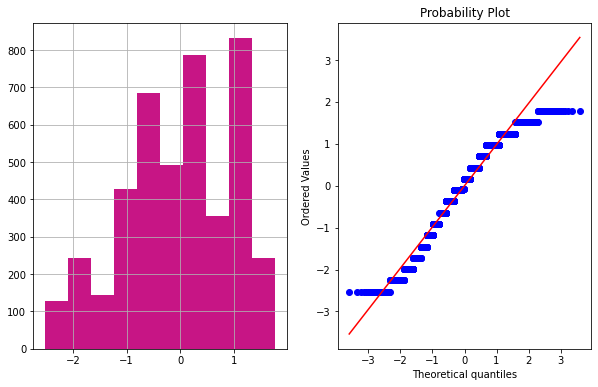

In [44]:
plot_data(df_X_scaled,'year')

## Exporting Transformed Dataset 

In [45]:
df_scaled.to_csv('CDSPP_FT.csv', encoding='utf-8', index=False)